In [19]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import plotly
import plotly.graph_objects as go
import plotly.subplots as sp
import warnings
warnings.filterwarnings('ignore')

# Introduction to the SCOPE Algorithm
![roadmap.png](SCOPE-image.png)
### Project Roadmap
- SCOPE-Stabilized LASSO Regression (bootstrapped LASSO regression)
- Co-expression analysis and differential co-expression analysis
- Pathway Enrichment with Over Representation Analysis

Project presentation can be found [here](https://docs.google.com/presentation/d/1tW0v9P5XlnkO6o_NDJxiBsDePgKBlal7V_28-sQOtH8/edit?usp=sharing). 

## SCOPE-Stabilized LASSO Regression 

In [20]:
lasso_summary = pd.read_csv("data-processed/stabilized_lasso_Summary.csv").sort_values(by="model.count", ascending=False)
lasso_summary.rename(columns={"model.count":"model_count", "min.val":"min_val", "max.val":"max_val"}, inplace=True)

# set threshold as 800 
lasso_top_30 = lasso_summary.head(30)
lasso_top_30.head(5)

,probe,model_count,min_val,max_val
3,ENSG00000008130,957,0.000041,1.565865
93,ENSG00000172456,948,-2.005558,-0.000041
60,ENSG00000152022,907,0.000018,1.689454
63,ENSG00000154309,869,-1.423527,-0.000138
39,ENSG00000125703,734,-1.145421,-0.000004


In [21]:
# rearrange dataframe
lasso_melt = pd.melt(lasso_top_30, id_vars=["probe", "model_count"], value_vars=["min_val", "max_val"])
rename_variable = {"min_val":"Minimum Value", "max_val": "Maximum Value"}
lasso_melt["variable"] = lasso_melt["variable"].replace(rename_variable)
lasso_melt.head()

,probe,model_count,variable,value
0,ENSG00000008130,957,Minimum Value,0.000041
1,ENSG00000172456,948,Minimum Value,-2.005558
2,ENSG00000152022,907,Minimum Value,0.000018
3,ENSG00000154309,869,Minimum Value,-1.423527
4,ENSG00000125703,734,Minimum Value,-1.145421


Text(0.5, 0.001, 'Figure 1. Comparing number of counts, minimum value of coefficient, and maximum value of coefficients of top 30 model count genes.')

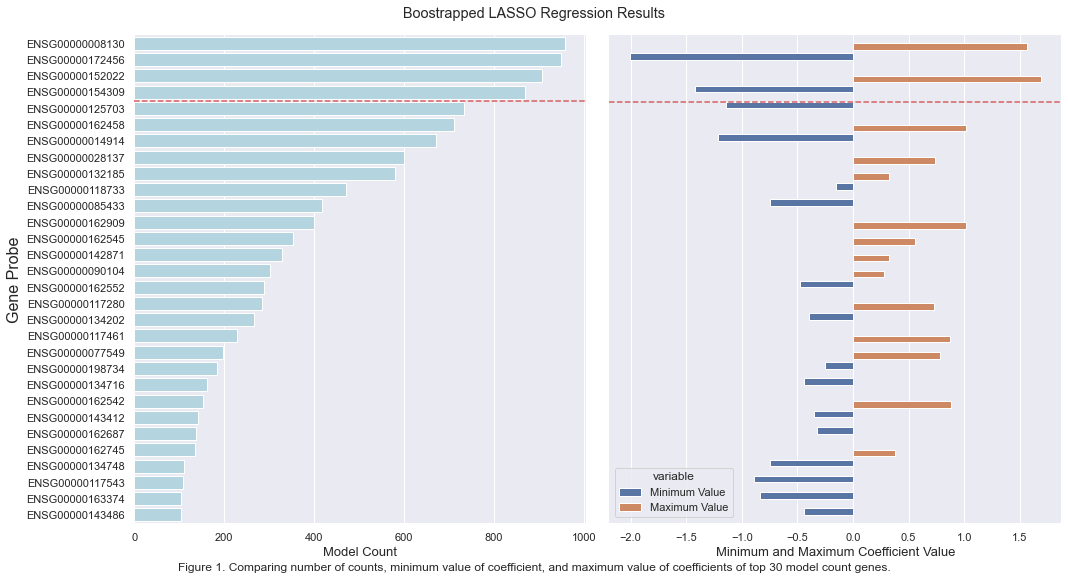

In [22]:
# stabilized LASSO regression visualizations
fig, axis = plt.subplots(1,2, sharex=False, figsize=(15, 8))
sns.set(style="darkgrid")
sns.set_color_codes("muted")
fig.suptitle("Boostrapped LASSO Regression Results")
sp1 = sns.barplot(ax=axis[0], x=lasso_top_30.model_count, y=lasso_top_30.probe, color="lightblue")
sp1.set_ylabel("Gene Probe", fontsize=16)
sp1.set_xlabel("Model Count", fontsize=13)
sp1.axhline(3.55, 0, 3, color="r", ls="--")
sp2 = sns.barplot(ax=axis[1], data=lasso_melt, x="value", y="probe", hue="variable")
sp2.set(ylabel=None)
sp2.set_xlabel("Minimum and Maximum Coefficient Value", fontsize=13)
sns.despine(left=True, bottom=True)
for i in range(1, len(axis)):
    axis[i].set_ylim(axis[0].get_ylim())
    axis[i].set_yticks([])
fig.tight_layout()
sp2.axhline(3.6, 0, 2, color="r", ls="--")
fig.text(0.5, 0.001, "Figure 1. Comparing number of counts, minimum value of coefficient, and maximum value of coefficients of top 30 model count genes.", ha="center")

## Correlational Analysis and Differential Correlational Analysis

In [23]:
corr_null_results = pd.read_csv("data-processed/stabilized_lasso_CorrNull.csv")
corr_null_results.head()

,V1,V2,V2.1,V2.2,V2.3,V2.4,V2.5,V2.6,V2.7,V2.8,...,V2.89,V2.90,V2.91,V2.92,V2.93,V2.94,V2.95,V2.96,V2.97,V2.98
0,0.152465,0.101848,-0.341007,0.693420,0.389426,0.405393,0.366638,0.144042,0.114895,-0.318944,...,-0.379912,-0.006347,-0.000611,-0.305082,0.592489,0.510122,-0.260865,0.020149,-0.398492,-0.506692
1,-0.350794,-0.179775,-0.053753,0.046014,0.120158,-0.019292,-0.080286,0.169697,0.383017,0.376449,...,0.373038,0.106351,0.526839,0.044904,0.470477,-0.175981,0.205579,0.315006,-0.195386,-0.587683
2,0.075967,-0.089334,-0.199877,0.091008,0.708601,-0.440103,-0.064499,0.861468,0.095961,-0.097158,...,-0.368169,0.226401,-0.139782,-0.287099,0.482892,-0.368456,-0.443751,-0.131161,0.059609,0.410351
3,-0.517644,0.197021,-0.349946,0.242594,-0.030470,-0.341168,-0.368444,0.845514,0.088243,-0.370735,...,-0.099781,0.183869,-0.302391,0.282213,0.310060,-0.369710,-0.053357,0.063697,0.866426,-0.504240
4,-0.092750,-0.311163,0.464793,0.496910,-0.493649,-0.547190,-0.048201,-0.002201,0.057213,0.092978,...,0.059947,-0.034841,-0.181875,-0.441742,0.534042,-0.333280,-0.230877,0.324049,-0.288081,0.291552


In [24]:
diffcor_results = pd.read_csv("data-processed/stabilized_lasso_DiffCorrNull.csv")
diffcor_results.head()

,V1,V2,V2.1,V2.2,V2.3,V2.4,V2.5,V2.6,V2.7,V2.8,...,V2.89,V2.90,V2.91,V2.92,V2.93,V2.94,V2.95,V2.96,V2.97,V2.98
0,0.258971,0.232252,0.273933,0.297542,0.482674,0.289630,0.738230,0.362781,0.064043,0.201294,...,0.459105,0.681908,0.273260,0.060790,0.006174,0.064043,0.041569,0.208702,0.625458,0.142673
1,0.061329,0.464621,0.370733,0.295629,0.181970,0.006673,0.107124,0.222314,0.014490,0.287193,...,0.362893,0.061772,0.149606,0.204144,0.154486,0.653515,0.373405,0.343295,0.249635,0.889206
2,0.866007,0.068388,1.044490,0.065488,0.306511,0.016790,0.614627,0.135584,0.303002,0.122704,...,0.388208,0.737435,0.710454,0.115972,0.076884,0.053184,0.337068,0.317149,0.328573,0.098222
3,0.541648,0.914228,0.693452,0.594225,0.203860,0.205596,0.096702,0.191623,0.008465,0.041361,...,0.025510,0.220931,0.505167,0.310508,0.252253,0.298201,0.625590,0.360661,0.163929,0.276558
4,0.611160,0.447238,0.435571,0.229832,0.090009,0.360661,0.460420,0.162510,0.186701,0.254427,...,0.379063,0.032869,0.441801,0.483342,0.502804,0.052785,0.030075,0.899569,0.317149,0.757442


In [25]:
def calculate_mean(df):
    df["Mean"] = df.mean(axis=1)
    return df

diffcor = calculate_mean(diffcor_results)
cor = calculate_mean(corr_null_results)

Text(0.1, -2.5, 'Figure 2. Comparing number of counts, minimum value of coefficient, and maximum value of coefficients of top 30 model count genes.')

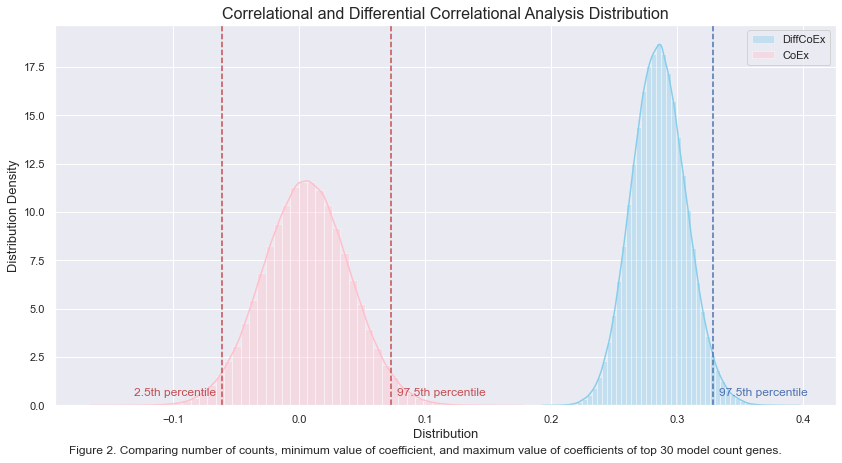

In [26]:
plt.figure(figsize=(14, 7))
sns.set()
sns.distplot(diffcor["Mean"], color="skyblue", label="DiffCoEx", kde=True)
sns.distplot(cor["Mean"], color="pink", label="CoEx", kde=True)
plt.title("Correlational and Differential Correlational Analysis Distribution", fontsize=16)
plt.axvline(cor["Mean"].quantile(0.975), 0, 1, color="r", ls="--")
plt.axvline(cor["Mean"].quantile(0.025), 0, 1, color="r", ls="--")
plt.axvline(diffcor["Mean"].quantile(0.975), 0, 1, color="b", ls="--")
plt.xlabel("Distribution", fontsize=13)
plt.ylabel("Distribution Density", fontsize=13)
plt.text(cor["Mean"].quantile(0.975)+0.005, 0.5, "97.5th percentile", color="r", size="medium")
plt.text(cor["Mean"].quantile(0.025)-0.07, 0.5, "2.5th percentile", color="r", size="medium")
plt.text(diffcor["Mean"].quantile(0.975)+0.005, 0.5, "97.5th percentile", color="b", size="medium")
plt.legend()
plt.text(0.1, -2.5, "Figure 2. Comparing number of counts, minimum value of coefficient, and maximum value of coefficients of top 30 model count genes.", ha="center")

## Pathway Enrichment

In [27]:
secondary_genes = pd.read_csv("data-processed/stabilized_lasso_SecondaryGenes.csv")
secondary_genes.head()

,Core Gene,Secondary Gene,Core Gene Name,Secondary Gene Name,Correlation,Correlation p-value,Tumor Correlation,Tumor Correlation p-value,Normal Correlation,Normal Correlation p-value,Differential Correlation
0,ENSG00000008130,ENSG00000188157,NADK,AGRN,0.778836,4.671070e-17,0.227022,1.091405e-01,0.399327,0.039063,0.172305
1,ENSG00000008130,ENSG00000078808,NADK,SDF4,0.820375,3.940097e-20,0.545774,3.440619e-05,0.608182,0.000764,0.062408
2,ENSG00000008130,ENSG00000160087,NADK,UBE2J2,0.869161,5.994963e-25,0.630211,7.208964e-07,0.548079,0.003080,0.082132
3,ENSG00000008130,ENSG00000179403,NADK,VWA1,0.822238,2.750001e-20,0.403819,3.296776e-03,0.194194,0.331750,0.209625
4,ENSG00000008130,ENSG00000160072,NADK,ATAD3B,0.718550,1.294132e-13,0.456687,7.555769e-04,-0.070366,0.727266,0.527054


In [28]:
pathways = pd.read_csv("data-processed/GSE98394_Pathways.csv")
pathways.head()

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId,Core Gene,Core Gene Name,Cancer,pathway_class
0,hsa04142,Lysosome,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,123,33,11.840541,2.787035,2.909544e-08,0.000009,10312;1176;130340;1508;1509;1520;1522;162;1777...,ENSG00000179163;ENSG00000162511;ENSG0000011741...,ENSG00000008130,NADK,GSE98394,Cellular Processes; Transport and catabolism
1,hsa04380,Osteoclast differentiation,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,128,29,12.321864,2.353540,8.485689e-06,0.001174,10288;10859;11006;1435;1535;2209;2212;2214;235...,ENSG00000117461;ENSG00000184371;ENSG0000015033...,ENSG00000008130,NADK,GSE98394,Organismal Systems; Development and regeneration
2,hsa00052,Galactose metabolism,http://www.kegg.jp/kegg-bin/show_pathway?hsa00...,31,12,2.984201,4.021176,1.454464e-05,0.001174,130589;231;2548;2582;2592;2595;2683;3099;3101;...,ENSG00000117308;ENSG00000079739;ENSG0000015651...,ENSG00000008130,NADK,GSE98394,Metabolism; Carbohydrate metabolism
3,hsa04145,Phagosome,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,152,32,14.632213,2.186956,1.490811e-05,0.001174,10312;1520;1535;1536;2209;2212;2214;245973;299...,ENSG00000117410;ENSG00000150337;ENSG0000016313...,ENSG00000008130,NADK,GSE98394,Cellular Processes; Transport and catabolism
4,hsa05152,Tuberculosis,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,179,35,17.231356,2.031181,3.214250e-05,0.002025,10312;1051;1378;1509;1520;2209;2212;2214;30835...,ENSG00000117410;ENSG00000150337;ENSG0000016313...,ENSG00000008130,NADK,GSE98394,Human Diseases; Infectious disease: bacterial


In [29]:
cleaned_pathways = pd.read_csv("GSE98394_sheet2.csv")
cleaned_pathways.head()

FileNotFoundError: [Errno 2] No such file or directory: 'GSE98394_sheet2.csv'

In [ ]:
def create_pivot_tables(gene_pathway):
    for ind, row in cleaned_pathways.iterrows():
        if row["Pathway Name"] == gene_pathway:
            userId = row["GeneSet"]
            
    pathway_isolation = pathways[pathways["geneSet"] == userId]["userId"].tolist()
    pathway_list = " ".join(pathway_isolation).split(";")

    col_names = ["Core Gene", "Secondary Gene", "Tumor Correlation", "Normal Correlation"]
    df = pd.DataFrame(columns=col_names)

    for index, row in secondary_genes.iterrows():
        if row["Secondary Gene"] in pathway_list:
            newdict = {"Core Gene":row["Core Gene Name"],
                      "Secondary Gene":row["Secondary Gene"],
                      "Tumor Correlation":row["Tumor Correlation"],
                      "Normal Correlation":row["Normal Correlation"]}
            df = df.append(newdict, ignore_index=True)  
            
    df["Core Gene"] = df["Core Gene"].replace(np.nan, "NaN", regex=True)
    return df

def create_heatmaps(gene_pathway):
    df = create_pivot_tables(gene_pathway)
    
    tumor_result = df.pivot(index="Secondary Gene", columns="Core Gene", values="Tumor Correlation")
    tumor_result.fillna(0, inplace=True)

    normal_result = df.pivot(index="Secondary Gene", columns="Core Gene", values="Normal Correlation")
    normal_result.fillna(0, inplace=True)

    diff_result = df
    diff_result["Difference"] = diff_result["Tumor Correlation"] - diff_result["Normal Correlation"]
    diff_result = diff_result.pivot(index="Secondary Gene", columns="Core Gene", values="Difference")
    diff_result.fillna(0, inplace=True)
    
    fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,10))
    map1 = sns.heatmap(tumor_result, cbar=False, linewidths=1, square=False, cmap="PiYG", annot = True, annot_kws={"size":7}, center=0, ax=ax[0])
    map2 = sns.heatmap(normal_result, linewidths=1, square=False, cmap="PiYG", annot = True, annot_kws={"size":7}, center=0, ax=ax[1])
    map3 = sns.heatmap(diff_result, linewidths=1, square=False, cmap="vlag", annot = True, annot_kws={"size":7}, center=0, ax=ax[2])
    map2.set_ylabel("")
    map3.set_ylabel("")
    map1.set_xlabel("")
    map2.set_xlabel("Core Gene", fontsize=14)
    map3.set_xlabel("")
    map1.set_title("Tumor Correlation")
    map2.set_title("Normal Correlation")
    map3.set_title("Correlation Difference")
    plt.suptitle("Pathway Name: " + str(gene_pathway), y=0.925)
    fig.text(0.5, 0.05, "Figure 3. Comparing number of counts, minimum value of coefficient, and maximum value of coefficients of top 30 model count genes.", ha="center")
    plt.show()
    
create_heatmaps("Lysosome")

In [ ]:
all_path = cleaned_pathways["Pathway Name"].unique()

col_names = ["Pathway Name", "Core Gene", "Secondary Gene", "Tumor Correlation", "Normal Correlation"]
final_df = pd.DataFrame(columns=col_names)

for pathway in all_path:
    for ind, row in cleaned_pathways.iterrows():
        if row["Pathway Name"] == pathway:
            userId = row["GeneSet"]
            
    pathway_isolation = pathways[pathways["geneSet"] == userId]["userId"].tolist()
    pathway_list = " ".join(pathway_isolation).split(";")

    for index, row in secondary_genes.iterrows():
        if row["Secondary Gene"] in pathway_list:
            newdict = {"Pathway Name":pathway,
                       "Core Gene":row["Core Gene Name"],
                       "Secondary Gene":row["Secondary Gene"],
                       "Tumor Correlation":row["Tumor Correlation"],
                       "Normal Correlation":row["Normal Correlation"]}
            final_df = final_df.append(newdict, ignore_index=True)  

final_df.head()

In [ ]:
interactive_fig = sp.make_subplots(rows=1, cols=3,
                                   subplot_titles=("Tumor", "Normal", "Difference"))

pathways_list = cleaned_pathways["Pathway Name"].unique()
firstvis = lambda x: True if (x=="Galactose metabolism") else False

pathway_buttons = []
currnum = 0

for pathway in pathways_list:
    df = final_df[final_df["Pathway Name"] == pathway]
    df["Core Gene"] = df["Core Gene"].replace(np.nan, "ENSG00000152022", regex=True)
    df["Difference"] = df["Tumor Correlation"] - df["Normal Correlation"]
    df_melt = pd.melt(df, id_vars=["Core Gene", "Secondary Gene"], value_vars=["Tumor Correlation", "Normal Correlation", "Difference"])
    df_melt["Pathway"] = pathway
    
    customdata = np.stack((df_melt["Core Gene"], 
                           df_melt["Secondary Gene"], 
                           df_melt["value"],
                           df_melt["Pathway"]), axis=1)
    hovertemplate = "<br>".join(["<b>Core Gene:  %{customdata[0]}</b>",
                                 "Secondary Gene: %{customdata[1]}",
                                 "Pathway: %{customdata[3]}",
                                 "Correlation Value: %{customdata[2]}"])
    tumor_trace = go.Heatmap(z=df_melt.loc[df_melt["variable"]=="Tumor Correlation"]["value"],
                             x=df_melt.loc[df_melt["variable"]=="Tumor Correlation"]["Core Gene"], 
                             y=df_melt.loc[df_melt["variable"]=="Tumor Correlation"]["Secondary Gene"],
                             visible=firstvis(pathway), name="Tumor", coloraxis = "coloraxis",
                             customdata = customdata,
                             hovertemplate=hovertemplate, hoverinfo = "x", hoverongaps=False)
    normal_trace = go.Heatmap(z=df_melt.loc[df_melt["variable"]=="Normal Correlation"]["value"],
                              x=df_melt.loc[df_melt["variable"]=="Normal Correlation"]["Core Gene"], 
                              y=df_melt.loc[df_melt["variable"]=="Normal Correlation"]["Secondary Gene"],
                              visible=firstvis(pathway), name="Normal", coloraxis = "coloraxis",
                              customdata = customdata,
                              hovertemplate=hovertemplate, hoverongaps=False)
    diff_trace = go.Heatmap(z=df_melt.loc[df_melt["variable"]=="Difference"]["value"],
                            x=df_melt.loc[df_melt["variable"]=="Difference"]["Core Gene"], 
                            y=df_melt.loc[df_melt["variable"]=="Difference"]["Secondary Gene"],
                            visible=firstvis(pathway), name="Difference", coloraxis = "coloraxis",
                            customdata = customdata,
                            hovertemplate=hovertemplate, hoverongaps=False)
    interactive_fig.append_trace(tumor_trace, 1,1)
    interactive_fig.append_trace(normal_trace, 1,2)
    interactive_fig.append_trace(diff_trace, 1,3)

for pathway in pathways_list:
    global currnum
    traces = [False] * len(interactive_fig.data)
    oldnum = currnum
    currnum += 3
    traces[0:oldnum] = [False for i in traces[0:oldnum]]
    traces[oldnum:currnum] = [True for i in traces[oldnum:currnum]]
    pathway_buttons.append(dict(label=str(pathway),
                               method="update", args=[{"visible":traces}]))

interactive_fig.update_layout(updatemenus=[dict(active=0,
                                                buttons=pathway_buttons,
                                                direction="down", pad={"r": 0, "t": 10},
                                                showactive=True, x=0, xanchor="left", y=1.14, yanchor="top")],
                             showlegend=False, width=700, height=700, title_text= "Compare Correlation", title_x=0.6, title_y=0.999)

interactive_fig.update_layout(coloraxis = {'colorscale':"RdBu_r"})
interactive_fig.update_yaxes(showticklabels=False, row=1, col=2)
interactive_fig.update_yaxes(showticklabels=False, row=1, col=3)

In [ ]:
df = create_pivot_tables("Phagosome")
tumor_result = df.pivot(index="Secondary Gene", columns="Core Gene", values="Tumor Correlation")
tumor_result.fillna(0, inplace=True)

normal_result = df.pivot(index="Secondary Gene", columns="Core Gene", values="Normal Correlation")
normal_result.fillna(0, inplace=True)

diff_result = df
diff_result["Difference"] = diff_result["Tumor Correlation"] - diff_result["Normal Correlation"]
diff_result = diff_result.pivot(index="Secondary Gene", columns="Core Gene", values="Difference")
diff_result.fillna(0, inplace=True)

pathways_list = cleaned_pathways["Pathway Name"].unique()

fig1 = px.imshow(tumor_result, x=tumor_result.columns, y=tumor_result.index, aspect="auto", text_auto=True,
                color_continuous_scale='RdBu_r', origin='lower')
fig1.update_layout(width=700, height=800)
fig1.show()

In [ ]:
FGGY = cleaned_pathways.sort_values(by = "FGGY", ascending=False)
plt.figure(figsize=(6, 13))
sns.barplot(data=FGGY, x="FGGY", y="Pathway Name", palette="GnBu_r")
plt.xlabel("Correlation Value")
plt.title("FGGY Corrleation", fontsize=15)
plt.text(0.1, 49, "Figure 4. FGGY pathways", ha="center")

In [ ]:
changed_pathways = pathways
changed_pathways.fillna(0, inplace=True)
changed_pathways["enrichmentRatio"] = np.log2(changed_pathways["enrichmentRatio"])
changed_pathways["FDR"] = np.log10(changed_pathways["FDR"]) * -1
fig, ax = plt.subplots(figsize=(15, 8)) 
sns.scatterplot(data=changed_pathways, x="enrichmentRatio", y="FDR", hue="overlap", palette="Greens_r")
plt.xlabel("Enrichment Ratio (log2)")
plt.ylabel("FDR (-log10)")
plt.title("Volcano Plot", fontsize=15)
plt.legend([],[], frameon=False)

colormap=matplotlib.cm.Greens_r
norm = plt.Normalize(changed_pathways.overlap.min(), changed_pathways.overlap.max())
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
ax.figure.colorbar(sm).set_label('Overlap Count')

for i, row in changed_pathways.iterrows():
    plt.text(row["enrichmentRatio"] + 0.02, row["FDR"] + 0.02, str(row["geneSet"]), fontsize=6)


plt.xlim(0.6, 2.2)
plt.savefig("visualizations/fig6.png")
plt.show()